In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft

In [2]:
dt1=pd.read_csv("Trace_EVT1272065836.908173614_908.2.txt", sep=" ")
dt2=pd.read_csv("Trace_EVT1272070496.820081490_820.1.txt",sep=" ")

In [3]:
dt1=dt1.rename(columns={"Unnamed: 1":"Tiempo Corregido", "LON,LAT,size":"Señal"})

In [4]:
ant=['R9RSR','R9GLG','R9AZL','R9NDJ','R9AEP','R9JNN','R9MRC']

In [5]:
x=dt1.loc[dt1["R9PLT"] == ant[0]].index.values
time=[dt1["Tiempo Corregido"].values[0:int(x)]]
señal=[dt1["Señal"].values[0:int(x)]]

for i in range(1,6):
    y=dt1.loc[dt1["R9PLT"] == ant[i]].index.values
    time.append(dt1["Tiempo Corregido"].values[int(x)+1:int(y)])
    señal.append(dt1["Señal"].values[int(x)+1:int(y)])
    x=y
    
x=dt1.loc[dt1["R9PLT"] == ant[6]].index.values
time.append(dt1["Tiempo Corregido"].values[int(x)+1:])
señal.append(dt1["Señal"].values[int(x)+1:])


In [6]:
señal=[señal[i].astype(int) for i in range(0,7)]

In [7]:
def f(t,ant):
    for i in range(len(time[ant])-1):
        if time[ant][i] <t and t<time[ant][i+1]:
            m=(señal[ant][i+1]-señal[ant][i])/(time[ant][i+1]-time[ant][i])
            b=señal[ant][i]-m*time[ant][i]
            f = m*t+b
            break
        elif time[ant][i]==t:
            f=señal[ant][i]
    return f

In [8]:
f(80,0)

88.90763731339189

In [9]:
y=fft(señal[0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


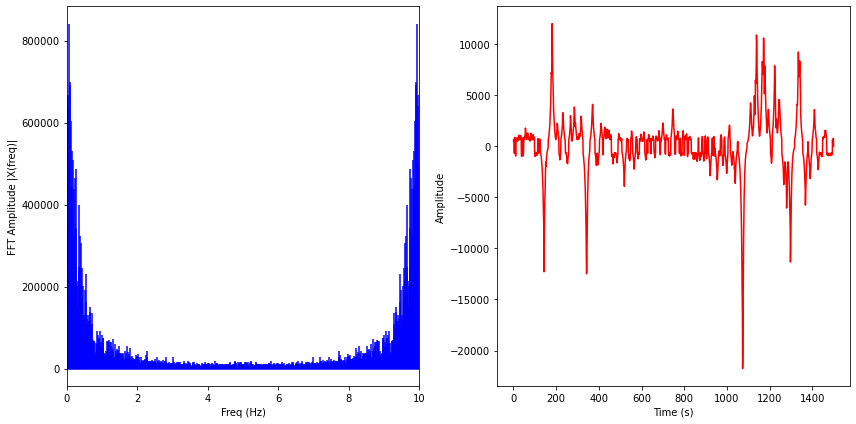

In [10]:
t=np.arange(len(time[0]))
N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Antena 0

In [11]:
a=time[0][900]
b=time[0][1400]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],0))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


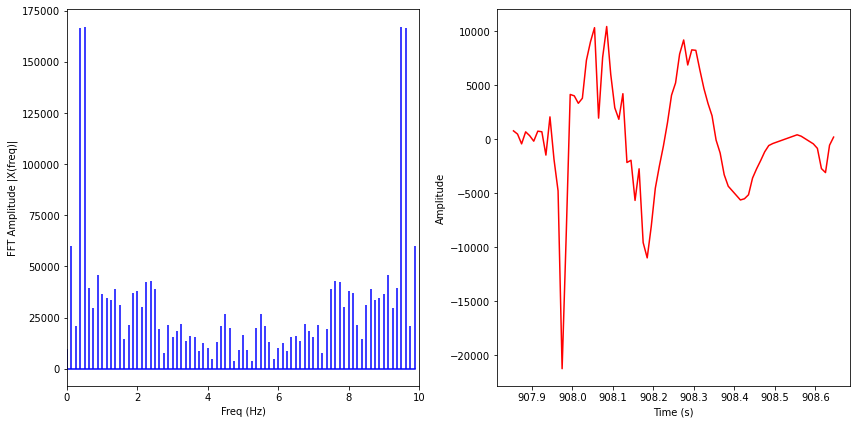

In [12]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

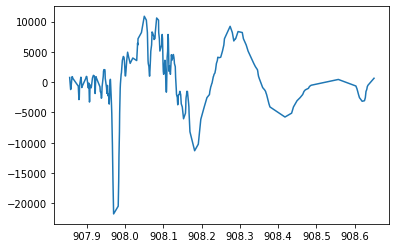

In [13]:

plt.plot(time[0][900:1400],señal[0][900:1400]) #[1000:1400]

# Antena 1

In [14]:
a=time[1][1000]
b=time[1][1400]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],1))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


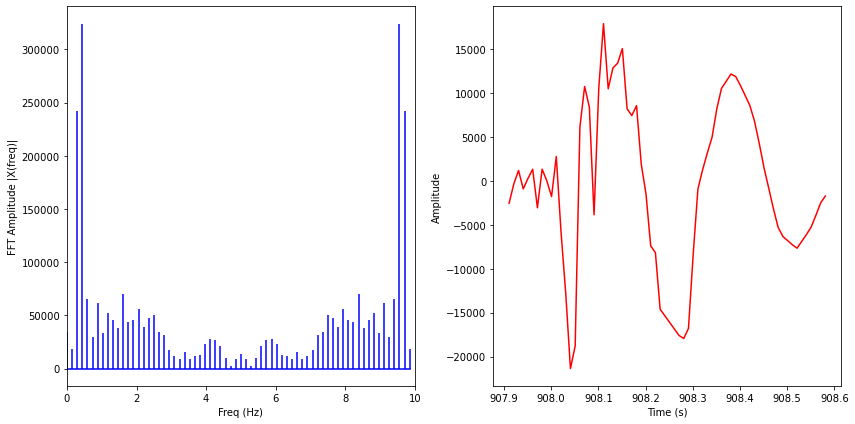

In [15]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

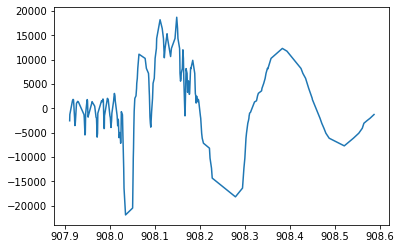

In [16]:
plt.plot(time[1][1000:1400],señal[1][1000:1400]) #[1000:1500] se pasa mucho

# Antena 2

In [17]:
a=time[2][800]
b=time[2][1200]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],2))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


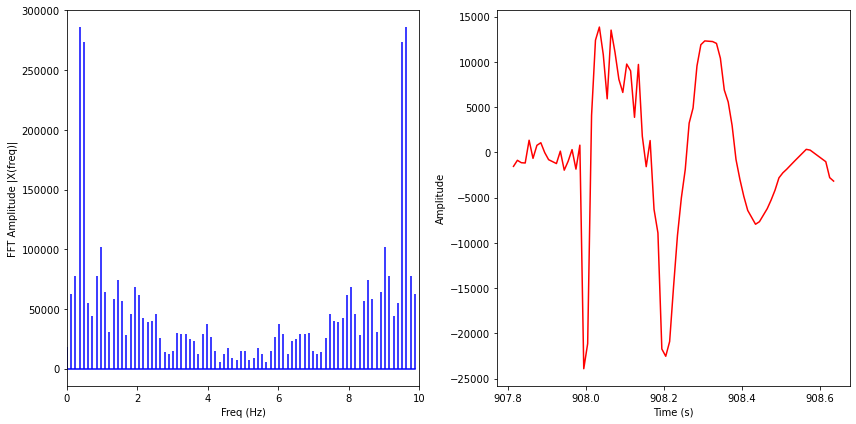

In [18]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

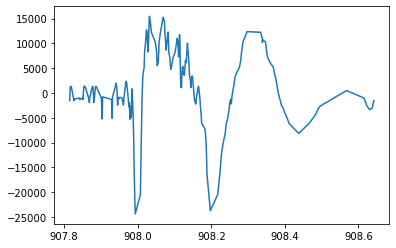

In [19]:

plt.plot(time[2][800:1200],señal[2][800:1200])

# Antena 3

In [20]:
#plt.plot(time[3],señal[3]) #apenas 27 datos

# Antena 4

In [21]:
a=time[4][1100]
b=time[4][1770]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],4))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


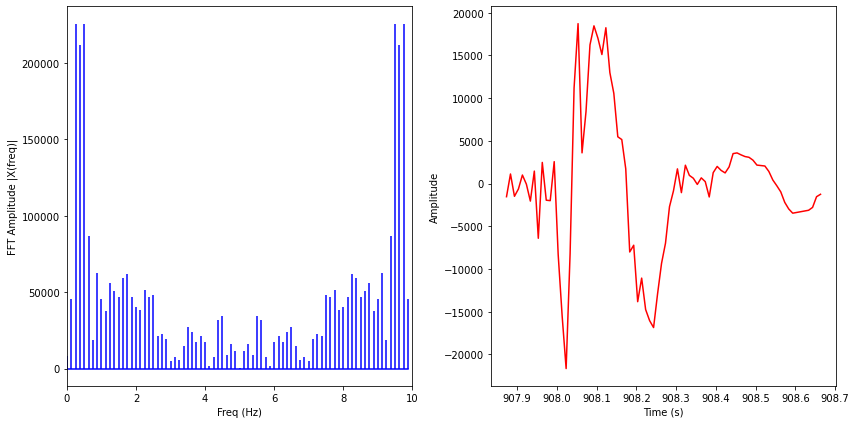

In [22]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

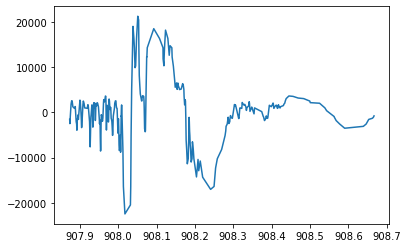

In [23]:
plt.plot(time[4][1100:1770],señal[4][1100:1770])

# Antena 5

In [24]:
a=time[5][750]
b=time[5][1170]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],5))
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


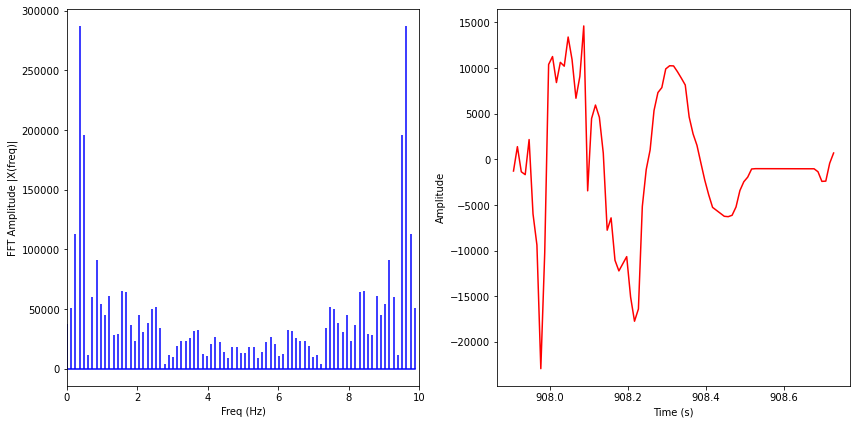

In [25]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

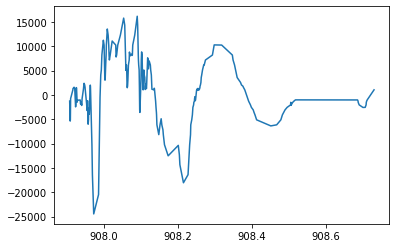

In [26]:
plt.plot(time[5][750:1170],señal[5][750:1170])

# Antena 6

In [27]:
a=time[6][1000]
b=time[6][1450]

paso=0.01
t=np.arange(a,b,paso)
s=[]
for i in range(len(t)):
    s.append(f(t[i],6))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


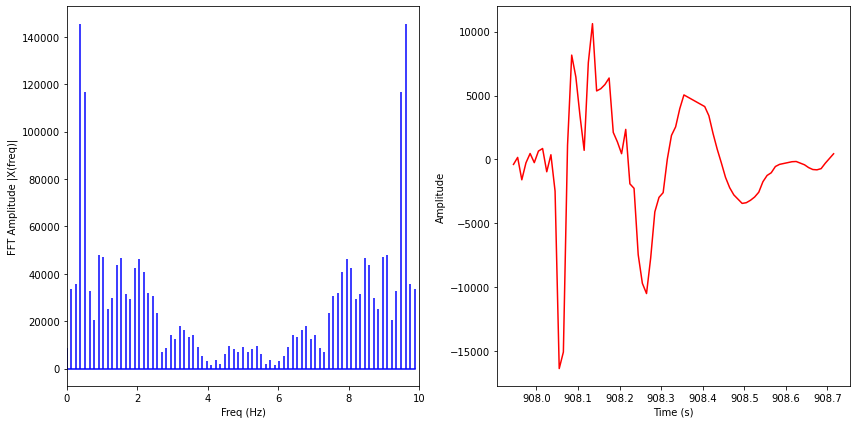

In [28]:
y=fft(s)

N=len(y)
n=np.arange(N)
T=N/10
freq=n/T

plt.figure(figsize= (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(y), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

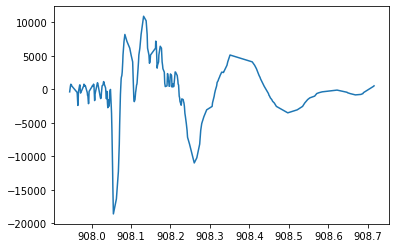

In [29]:
plt.plot(time[6][1000:1450],señal[6][1000:1450])